# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Add and Remove Noise and Fix COntrast with Histogram Equalization</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ How to add white noise or film grain effects to images <br>
2️⃣ How to implement Histogram Equalization <br>
</p>

In [1]:
# Our Setup, Import Libraries and Create our Imshow Function
import numpy as np
import cv2
import time
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
!unzip -qq images.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg

/home/robin/Self-learning/Tutorialspoint_Artificial_Intelligence_and_Machine_Learning_Certification_2026/Module_4_Modern_Computer_Vision/OpenCV/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=a8cbd1f6-b2b6-4212-a5c7-b12d11921eeb
To: /home/robin/Self-learning/Tutorialspoint_Artificial_Intelligence_and_Machine_Learning_Certification_2026/Module_4_Modern_Computer_Vision/OpenCV/8.OpenCV_Projects/images.zip
100%|██████████████████████████████████████| 29.6M/29.6M [00:02<00:00, 11.3MB/s]
--2026-01-18 20:37:48--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg
Resolving github.com (github.com)... 20.205.243.16

### **Adding Film Grain or Noise to Images** ##

In [2]:
import random

def addWhiteNoise(image):
    # Set the range for a random probability
    # A large prob will mean more noise
    prob = random.uniform(0.05, 0.1)

    # Generate a random matrix in the shape of our input image
    rnd = np.random.rand(image.shape[0], image.shape[1])

    # If the random values in our rnd matrix are less than our random probability
    # We randomly change the pixel in our input image to a value within the range specified
    image[rnd < prob] = np.random.randint(50, 230)

    return image

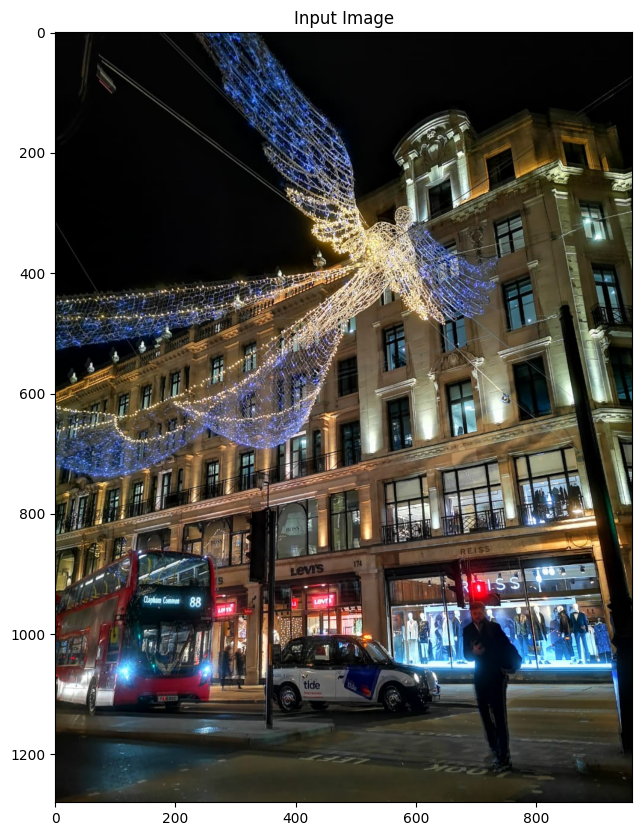

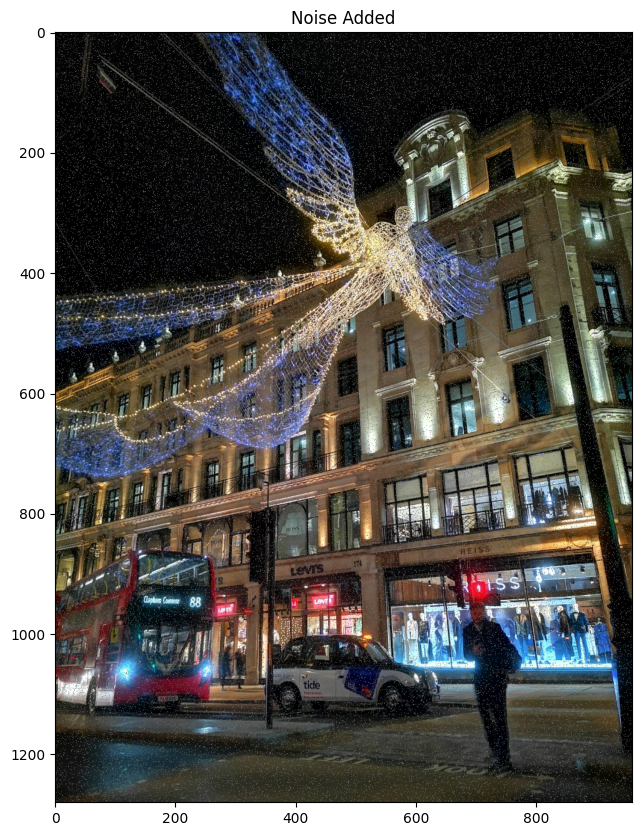

In [3]:
# Load our image
image = cv2.imread('../images/londonxmas.jpeg')
imshow("Input Image", image)

# Apply our white noise function to our input image
noise_1 = addWhiteNoise(image)
imshow("Noise Added", noise_1)

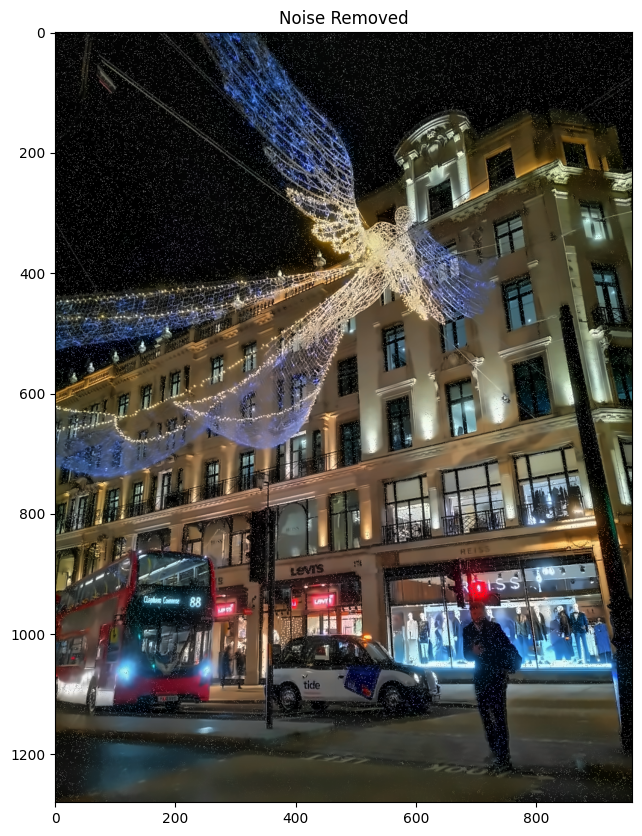

In [4]:
# cv2.fastNlMeansDenoisingColored(input, None, h, hForColorComponents, templateWindowSize, searchWindowSize)
# None are - the filter strength 'h' (5-12 is a good range)
# Next is hForColorComponents, set as same value as h again
# templateWindowSize (odd numbers only) rec. 7
# searchWindowSize (odd numbers only) rec. 21

dst = cv2.fastNlMeansDenoisingColored(noise_1, None, 11, 6, 7, 21)

imshow("Noise Removed", dst)

### **There are 4 variations of Non-Local Means Denoising:** 
1. cv2.fastNIMeansDenoising() - works with a single grayscale images.
2. cv2.fastNIMeansDenoisingColored() - works with a color image.
3. cv2.fastNIMeanDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
4. cv2.fastNIMeansDenoisingColoredMulti() - same as above, but for color images.
###

### **Using Histogram Equalization** ###

### **First, let's take a look at the Histogram of our Input Image** ###

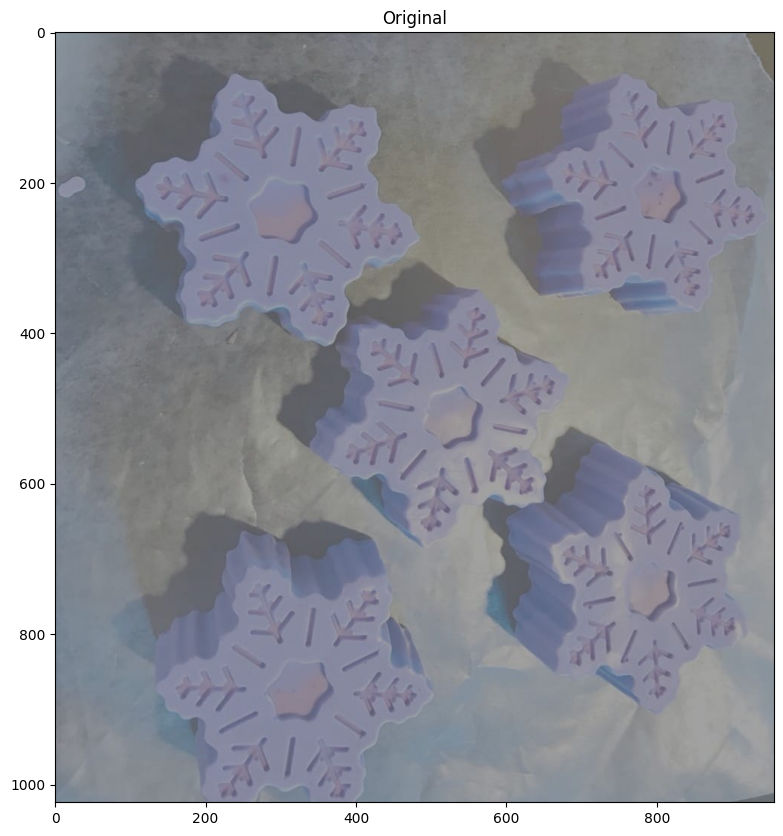

/tmp/ipykernel_57254/1000988763.py:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gray_image.flatten(), 256, [0, 256], color = 'r')


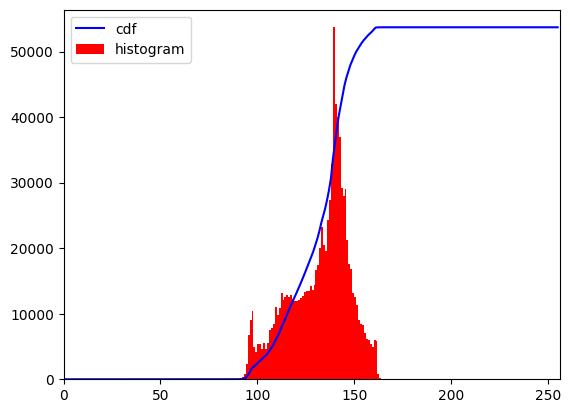

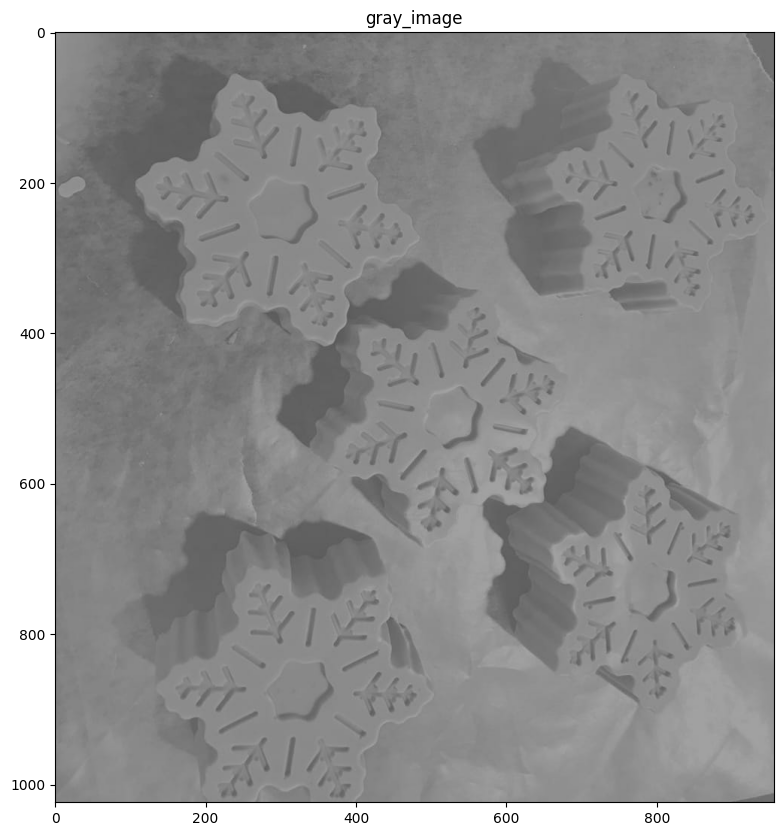

In [5]:
# Load our image
img = cv2.imread('../images/soaps.jpeg')
imshow("Original", img)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create our histogram distribution
hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

# Get the Cumulative Sum
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()
imshow("gray_image", gray_image)

### **Now, let's apply Histogram Equalization** ###

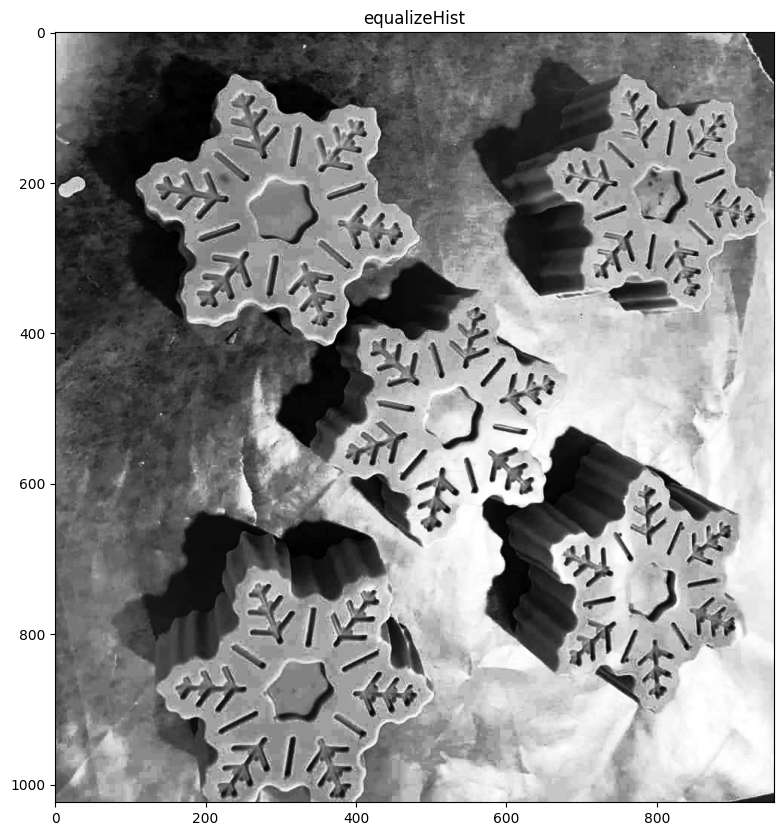

/tmp/ipykernel_57254/661893264.py:21: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gray_image.flatten(), 256, [0,256], color = 'r')


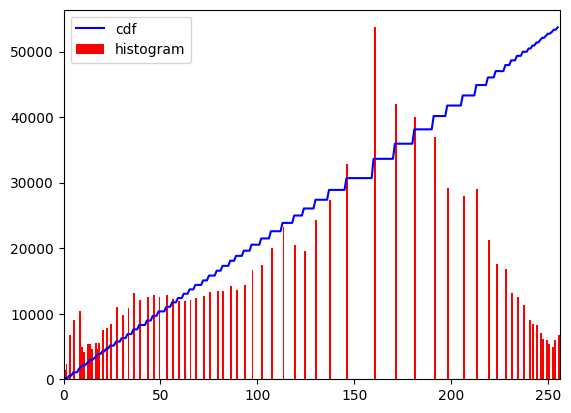

In [7]:
img = cv2.imread('../images/soaps.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Equalize our Histogram
gray_image = cv2.equalizeHist(gray_image)
imshow("equalizeHist", gray_image)

# Create our histogram distribution
hist, bins = np.histogram(gray_image.flatten(), 256, [0,256])

# Get the Cumulative Sum
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(), 256, [0,256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

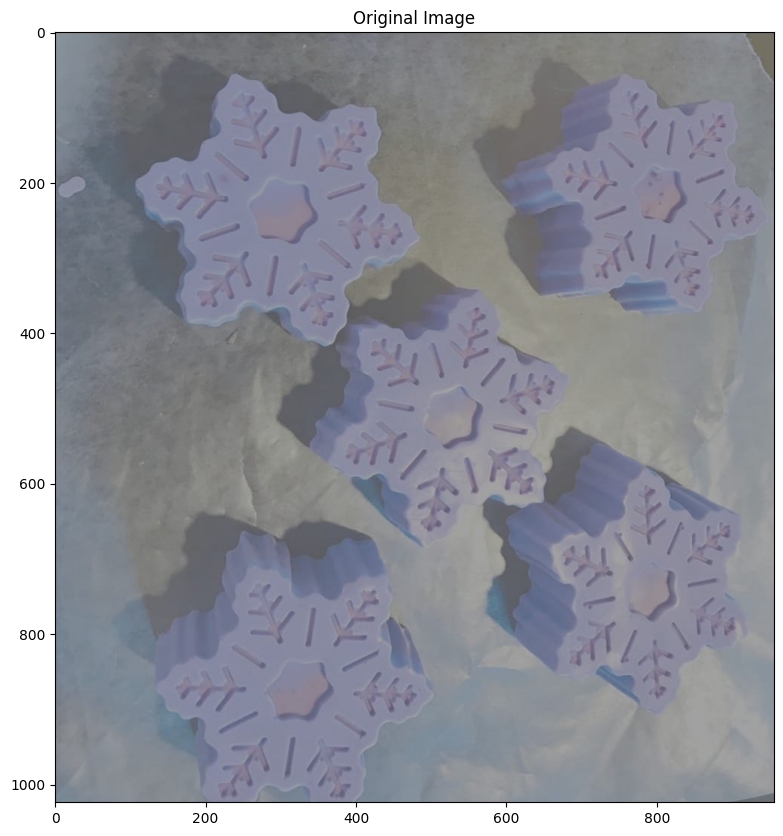

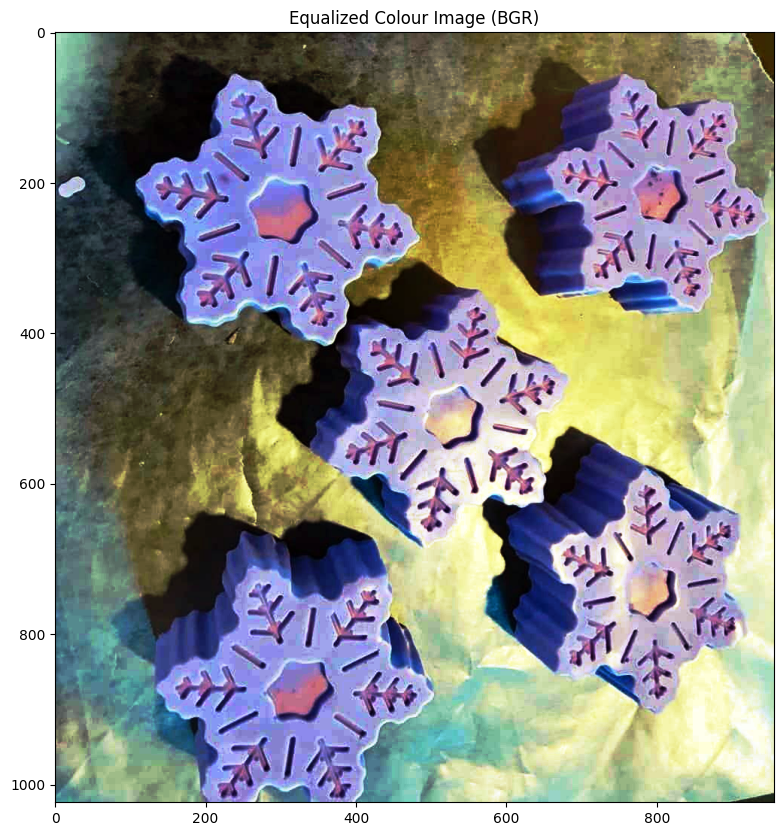

In [9]:
# Read image
img = cv2.imread("../images/soaps.jpeg")

# Split BGR channels
b, g, r = cv2.split(img)

# Equalize each channel independently
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

# Merge channels back
equalize_bgr = cv2.merge((b_eq, g_eq, r_eq))

# Display results
imshow("Original Image", img)
imshow("Equalized Colour Image (BGR)", equalize_bgr)